# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# The Data

Let's start by reading in the data file into a pandas dataframe.

In [2]:
xl = pd.ExcelFile(r'D:\BeCode\ML\SL\Challenge\Smart_Shipping_Study.xlsx')

In [3]:
xl.sheet_names

['Sheet1']

In [4]:
pd.set_option('display.max_columns', None)   # To see all the columns of data frame

In [5]:
df = xl.parse("Sheet1")
df.head()

Aanvang jaar   Verblijf       Reis FD nummer ANO  Max lengte  Productcode  \
0          2015  B01340080  150000012        FD_001      109.47      1090000   
1          2015  B01340080  150000012        FD_001      109.47      2312000   
2          2015  B01340358  150000019        FD_002      114.86      1202002   
3          2015  B01340358  150000019        FD_002      114.86      3082000   
4          2015  B01340345  150000025        FD_003      134.92      3082000   

                                             Product   DWT  Haven herkomst  \
0  ACETON (KETON PROPAAN, PROPANON, DIMETHYL KETO...  2851  Bergen op Zoom   
1                                   FENOL, GESMOLTEN  2851  Bergen op Zoom   
2  DIESELOLIE OF GASOLIE OF STOOKOLIE, LICHT (VLA...  3504      Vlissingen   
3                MILIEUGEVAARLIJKE VLOEISTOF, N.E.G.  3504      Vlissingen   
4                MILIEUGEVAARLIJKE VLOEISTOF, N.E.G.  6311       Rotterdam   

  Haven bestemming Route categorie     Scheepstype  
0   Bergen op Zoom         Vertrek  MOTORTANKSCHIP  
1   Bergen op Zoom         Vertrek  MOTORTANKSCHIP  
2       Vlissingen         Vertrek  MOTORTANKSCHIP  
3       Vlissingen         Vertrek  MOTORTANKSCHIP  
4        Rotterdam         Vertrek  MOTORTANKSCHIP

### Ship mapping data have duplicate values for "TANKDUWBAK (TDB), DROGE LADING"

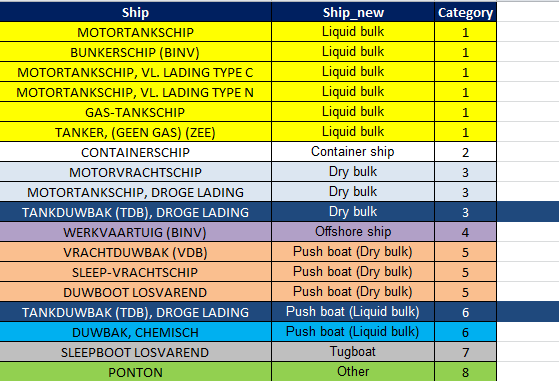

# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

<AxesSubplot:>

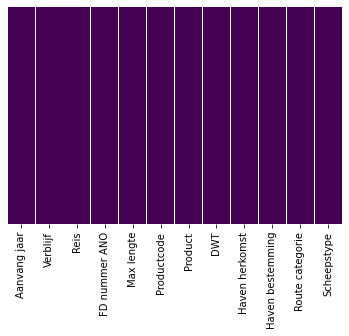

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### No missing data seen in the plot

In [7]:
df.shape

(174977, 12)

### Checking for Missing Values and Imputing Them

In [8]:
# Adding up the missing values (column-wise)
df.isnull().sum()

Aanvang jaar         0
Verblijf             0
Reis                 0
FD nummer ANO        0
Max lengte           0
Productcode          0
Product              0
DWT                  0
Haven herkomst       1
Haven bestemming    10
Route categorie      0
Scheepstype          0
dtype: int64

### Filling the missing values with most frequent

In [9]:
df["Haven herkomst"].fillna(value=df["Haven herkomst"].value_counts().index[0],inplace =True)
df["Haven bestemming"].fillna(value=df["Haven bestemming"].value_counts().index[0],inplace =True)

In [10]:
df.isnull().sum()

Aanvang jaar        0
Verblijf            0
Reis                0
FD nummer ANO       0
Max lengte          0
Productcode         0
Product             0
DWT                 0
Haven herkomst      0
Haven bestemming    0
Route categorie     0
Scheepstype         0
dtype: int64

In [11]:
# checking possible values each variable can take.
for c in df.columns:    
    if (df[c].dtype==object):
        print(c,df[c].unique())

Verblijf ['B01340080' 'B01340358' 'B01340345' ... 'B01801978' 'B01809442'
 'B01809447']
FD nummer ANO ['FD_001' 'FD_002' 'FD_003' ... 'FD_5094' 'FD_5095' 'FD_5096']
Product ['ACETON (KETON PROPAAN, PROPANON, DIMETHYL KETON, DIMETHYL FORMALDEHYDE)'
 'FENOL, GESMOLTEN'
 'DIESELOLIE OF GASOLIE OF STOOKOLIE, LICHT (VLAMPUNT HOGER DAN 61°C, DOCH TEN HOOGSTE 100°C)'
 ... 'HYDRAZINE, OPLOSSING IN WATER MET MEER DAN 37 MASSA-% HYDRAZINE'
 'BRANDSTOFRESERVOIR VOOR HYDRAULISCH AGGREGAAT VOOR VLIEGTUIGEN (DIE EEN MENGSEL VAN WATERVRIJE HYDRAZINE EN METHYLHYDRAZINE BEVAT) (M86 BRANDSTOF)'
 'LUCHT, STERK GEKOELD, VLOEIBAAR']
Haven herkomst ['Bergen op Zoom' 'Vlissingen' 'Rotterdam' ... 'Loos' 'Ditzum'
 'Port-Sainte-Marie']
Haven bestemming ['Bergen op Zoom' 'Vlissingen' 'Rotterdam' ... 'Valencin' 'Sepeaux'
 'Vallabrix']
Route categorie ['Vertrek' 'Aankomst' 'Doorvaart']
Scheepstype ['MOTORTANKSCHIP' 'BUNKERSCHIP (BINV)' 'MOTORVRACHTSCHIP'
 'VRACHTDUWBAK (VDB)' 'TANKDUWBAK (TDB)' 'CONTAINERSCHIP'
 '

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174977 entries, 0 to 174976
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Aanvang jaar      174977 non-null  int64  
 1   Verblijf          174977 non-null  object 
 2   Reis              174977 non-null  int64  
 3   FD nummer ANO     174977 non-null  object 
 4   Max lengte        174977 non-null  float64
 5   Productcode       174977 non-null  int64  
 6   Product           174977 non-null  object 
 7   DWT               174977 non-null  int64  
 8   Haven herkomst    174977 non-null  object 
 9   Haven bestemming  174977 non-null  object 
 10  Route categorie   174977 non-null  object 
 11  Scheepstype       174977 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 16.0+ MB


### Ships that have more than 1 'Max lengte' value

In [22]:
ships = df.groupby(['FD nummer ANO']).agg({'Max lengte' : 'nunique'})
print(len(ships), "number of unique ships",)

print('')
print(len(ships[ships['Max lengte'] > 1]), "out of 5096 ships have more than 1 value for length")
print('')
ship_FD_008 = df[df['FD nummer ANO'] == 'FD_008']
print("Example: ship FD008 with two different lengths", ship_FD_008['Max lengte'].unique())

5096 number of unique ships

194 out of 5096 ships have more than 1 value for length

Example: ship FD008 with two different lengths [52.61 73.6 ]


### Plotting the data

<AxesSubplot:xlabel='Aanvang jaar', ylabel='count'>

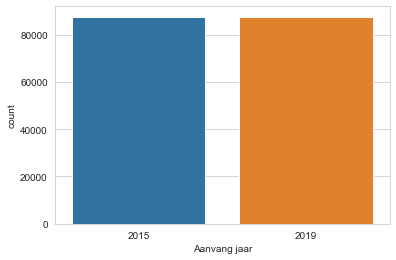

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Aanvang jaar',data=df)

### Data is evenly spread across the given two years

<AxesSubplot:xlabel='count', ylabel='Route categorie'>

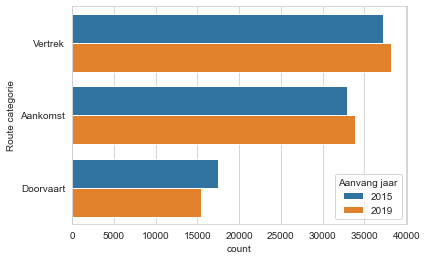

In [13]:
sns.set_style('whitegrid')
sns.countplot(y ='Route categorie', hue = 'Aanvang jaar', data=df)

<AxesSubplot:xlabel='count', ylabel='Scheepstype'>

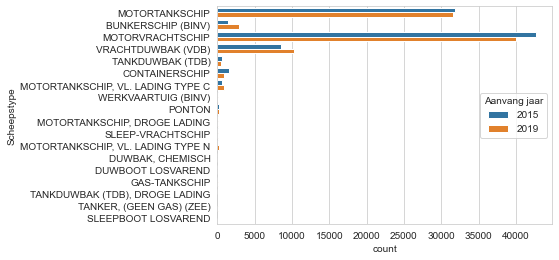

In [21]:
sns.set_style('whitegrid')
sns.countplot(y ='Scheepstype',hue = 'Aanvang jaar', data=df)

#### Motortankship & Motorvrachtship  count decreased but Bunkership & vrachtduwbank increased w.r.t 2015-2019

In [16]:
df.head()

Aanvang jaar   Verblijf       Reis FD nummer ANO  Max lengte  Productcode  \
0          2015  B01340080  150000012        FD_001      109.47      1090000   
1          2015  B01340080  150000012        FD_001      109.47      2312000   
2          2015  B01340358  150000019        FD_002      114.86      1202002   
3          2015  B01340358  150000019        FD_002      114.86      3082000   
4          2015  B01340345  150000025        FD_003      134.92      3082000   

                                             Product   DWT  Haven herkomst  \
0  ACETON (KETON PROPAAN, PROPANON, DIMETHYL KETO...  2851  Bergen op Zoom   
1                                   FENOL, GESMOLTEN  2851  Bergen op Zoom   
2  DIESELOLIE OF GASOLIE OF STOOKOLIE, LICHT (VLA...  3504      Vlissingen   
3                MILIEUGEVAARLIJKE VLOEISTOF, N.E.G.  3504      Vlissingen   
4                MILIEUGEVAARLIJKE VLOEISTOF, N.E.G.  6311       Rotterdam   

  Haven bestemming Route categorie     Scheepstype  
0   Bergen op Zoom         Vertrek  MOTORTANKSCHIP  
1   Bergen op Zoom         Vertrek  MOTORTANKSCHIP  
2       Vlissingen         Vertrek  MOTORTANKSCHIP  
3       Vlissingen         Vertrek  MOTORTANKSCHIP  
4        Rotterdam         Vertrek  MOTORTANKSCHIP

In [14]:
# Ship Class by length
'''Ship Class	
Klasse 1	<-	<38,5 - SPITS
Klasse 2	<-	38,51 - 55 m - KEMP
Klasse 3	<-	55,01 - 85 m
Klasse 4	<-	85,01 - 105 m
Klasse 5	<-	105,01 - 135,00 m
Klasse 6	<-	135,01 - .. m'''

bins= [0, 38.5, 55, 85, 105, 135, 1000]
labels = ['1','2','3','4','5','6']
df['ship_class_len'] = pd.cut(df['Max lengte'], bins=bins, labels=labels, right=True)
df.head()

Aanvang jaar   Verblijf       Reis FD nummer ANO  Max lengte  Productcode  \
0          2015  B01340080  150000012        FD_001      109.47      1090000   
1          2015  B01340080  150000012        FD_001      109.47      2312000   
2          2015  B01340358  150000019        FD_002      114.86      1202002   
3          2015  B01340358  150000019        FD_002      114.86      3082000   
4          2015  B01340345  150000025        FD_003      134.92      3082000   

                                             Product   DWT  Haven herkomst  \
0  ACETON (KETON PROPAAN, PROPANON, DIMETHYL KETO...  2851  Bergen op Zoom   
1                                   FENOL, GESMOLTEN  2851  Bergen op Zoom   
2  DIESELOLIE OF GASOLIE OF STOOKOLIE, LICHT (VLA...  3504      Vlissingen   
3                MILIEUGEVAARLIJKE VLOEISTOF, N.E.G.  3504      Vlissingen   
4                MILIEUGEVAARLIJKE VLOEISTOF, N.E.G.  6311       Rotterdam   

  Haven bestemming Route categorie     Scheepstype ship_class_len  
0   Bergen op Zoom         Vertrek  MOTORTANKSCHIP              5  
1   Bergen op Zoom         Vertrek  MOTORTANKSCHIP              5  
2       Vlissingen         Vertrek  MOTORTANKSCHIP              5  
3       Vlissingen         Vertrek  MOTORTANKSCHIP              5  
4        Rotterdam         Vertrek  MOTORTANKSCHIP              5

In [107]:
'''MOTORTANKSCHIP	->	Liquid bulk : 1
BUNKERSCHIP (BINV)	->	Liquid bulk : 1
MOTORTANKSCHIP, VL. LADING TYPE C	->	Liquid bulk : 1
MOTORTANKSCHIP, VL. LADING TYPE N	->	Liquid bulk : 1
GAS-TANKSCHIP	->	Liquid bulk : 1
TANKER, (GEEN GAS) (ZEE)	->	Liquid bulk : 1
CONTAINERSCHIP	->	Container ship : 2
MOTORVRACHTSCHIP	->	Dry bulk :3
MOTORTANKSCHIP, DROGE LADING	->	Dry bulk : 3
TANKDUWBAK (TDB), DROGE LADING	->	Dry bulk : 3
WERKVAARTUIG (BINV)	->	Offshore ship : 4
VRACHTDUWBAK (VDB)	->	Push boat (Dry bulk) :5
SLEEP-VRACHTSCHIP	->	Push boat (Dry bulk) :5
DUWBOOT LOSVAREND	->	Push boat (Dry bulk) : 5
TANKDUWBAK (TDB), DROGE LADING	->	Push boat (Liquid bulk) : 6
DUWBAK, CHEMISCH	->	Push boat (Liquid bulk) : 6
SLEEPBOOT LOSVAREND	->	Tugboat :7
PONTON	->	Other :8
'''

'MOTORTANKSCHIP\t->\tLiquid bulk : 1\nBUNKERSCHIP (BINV)\t->\tLiquid bulk : 1\nMOTORTANKSCHIP, VL. LADING TYPE C\t->\tLiquid bulk : 1\nMOTORTANKSCHIP, VL. LADING TYPE N\t->\tLiquid bulk : 1\nGAS-TANKSCHIP\t->\tLiquid bulk : 1\nTANKER, (GEEN GAS) (ZEE)\t->\tLiquid bulk : 1\nCONTAINERSCHIP\t->\tContainer ship : 2\nMOTORVRACHTSCHIP\t->\tDry bulk :3\nMOTORTANKSCHIP, DROGE LADING\t->\tDry bulk : 3\nTANKDUWBAK (TDB), DROGE LADING\t->\tDry bulk : 3\nWERKVAARTUIG (BINV)\t->\tOffshore ship : 4\nVRACHTDUWBAK (VDB)\t->\tPush boat (Dry bulk) :5\nSLEEP-VRACHTSCHIP\t->\tPush boat (Dry bulk) :5\nDUWBOOT LOSVAREND\t->\tPush boat (Dry bulk) : 5\nTANKDUWBAK (TDB), DROGE LADING\t->\tPush boat (Liquid bulk) : 6\nDUWBAK, CHEMISCH\t->\tPush boat (Liquid bulk) : 6\nSLEEPBOOT LOSVAREND\t->\tTugboat :7\nPONTON\t->\tOther :8\n'

In [15]:
def ship(x):
    if "MOTORTANKSCHIP" in x :
        return 1
    elif "BUNKERSCHIP (BINV)" in x :
        return 1
    elif "MOTORTANKSCHIP, VL. LADING TYPE C" in x :
        return 1    
    elif "MOTORTANKSCHIP, VL. LADING TYPE N" in x :
        return 1    
    elif "GAS-TANKSCHIP" in x :
        return 1    
    elif "TANKER, (GEEN GAS) (ZEE)" in x :
        return 1        
    elif "CONTAINERSCHIP" in x:
        return 2
    elif "MOTORVRACHTSCHIP" in x :
        return 3
    elif "MOTORTANKSCHIP, DROGE LADING" in x :
        return 3
    elif "TANKDUWBAK (TDB), DROGE LADING" in x :
        return 3    
    elif "WERKVAARTUIG (BINV)" in x:
        return 4
    elif "VRACHTDUWBAK (VDB)" in x:
        return 5
    elif "SLEEP-VRACHTSCHIP" in x:
        return 5
    elif "DUWBOOT LOSVAREND" in x:
        return 5    
    elif "TANKDUWBAK (TDB), DROGE LADING" in x:
        return 6
    elif "DUWBAK, CHEMISCH" in x:
        return 6    
    elif "SLEEPBOOT LOSVAREND" in x:
        return 7
    else: return 8

df["ship_type"] = df["Scheepstype"].apply(ship)
df.tail()

Aanvang jaar   Verblijf       Reis FD nummer ANO  Max lengte  \
174972          2019  B01801969  200018241       FD_1145      135.00   
174973          2019  B01801975  200018255       FD_1145      135.00   
174974          2019  B01801978  200018260       FD_1145      135.00   
174975          2019  B01809442  200043960       FD_5016       79.95   
174976          2019  B01809447  200043968       FD_5016       79.95   

        Productcode                                          Product   DWT  \
174972   2505900000  ZAND OVERIG, ZEE, ZOUT ETC [O.A. ZIRCONIUMZAND]  4232   
174973   2505900000  ZAND OVERIG, ZEE, ZOUT ETC [O.A. ZIRCONIUMZAND]  4232   
174974   2505900000  ZAND OVERIG, ZEE, ZOUT ETC [O.A. ZIRCONIUMZAND]  4232   
174975   2523100000                                   CEMENT KLINKER  1099   
174976   2523100000                                   CEMENT KLINKER  1099   

       Haven herkomst Haven bestemming Route categorie       Scheepstype  \
174972         Kalkar      Massenhoven       Doorvaart  MOTORVRACHTSCHIP   
174973         Kalkar      Massenhoven       Doorvaart  MOTORVRACHTSCHIP   
174974         Kalkar      Massenhoven       Doorvaart  MOTORVRACHTSCHIP   
174975       Kreekrak            Lixhe       Doorvaart  MOTORVRACHTSCHIP   
174976       Kreekrak          Merksem       Doorvaart  MOTORVRACHTSCHIP   

       ship_class_len  ship_type  
174972              5          3  
174973              5          3  
174974              5          3  
174975              3          3  
174976              3          3

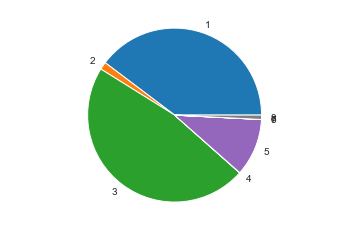

In [26]:
# Ship type

from matplotlib.pyplot import pie, axis, show

sums = df.Productcode.groupby(df.ship_type).count()
axis('equal');
pie(sums, labels=sums.index);
show()

### Dry bulk(3), Liquid bulk(1), Push boat -Dry bulk(5), Container ship(2) are 99.15% of total ships type

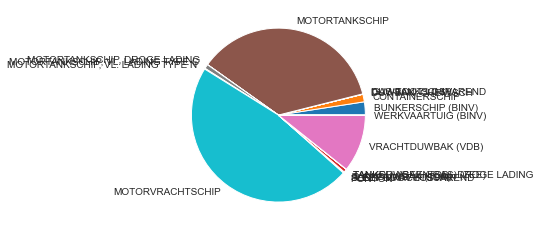

In [27]:
# Ship Type

from matplotlib.pyplot import pie, axis, show
sums = df.Productcode.groupby(df.Scheepstype).count()
axis('equal');
pie(sums, labels=sums.index);
show()

### MOTORVRACHTSCHIP & MOTORTANKSCHIP together forms 83.54 of ships

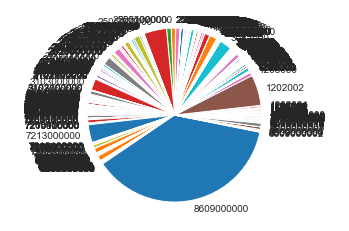

In [25]:
# Product code 

from matplotlib.pyplot import pie, axis, show
sums = df.ship_type.groupby(df.Productcode).sum()
axis('equal');
pie(sums, labels=sums.index);
show()

### 8609000000 (CONTAINERS) and 1202002 DIESELOLIE OF GASOLIE OF STOOKOLIE, LICHT are 40% of total products

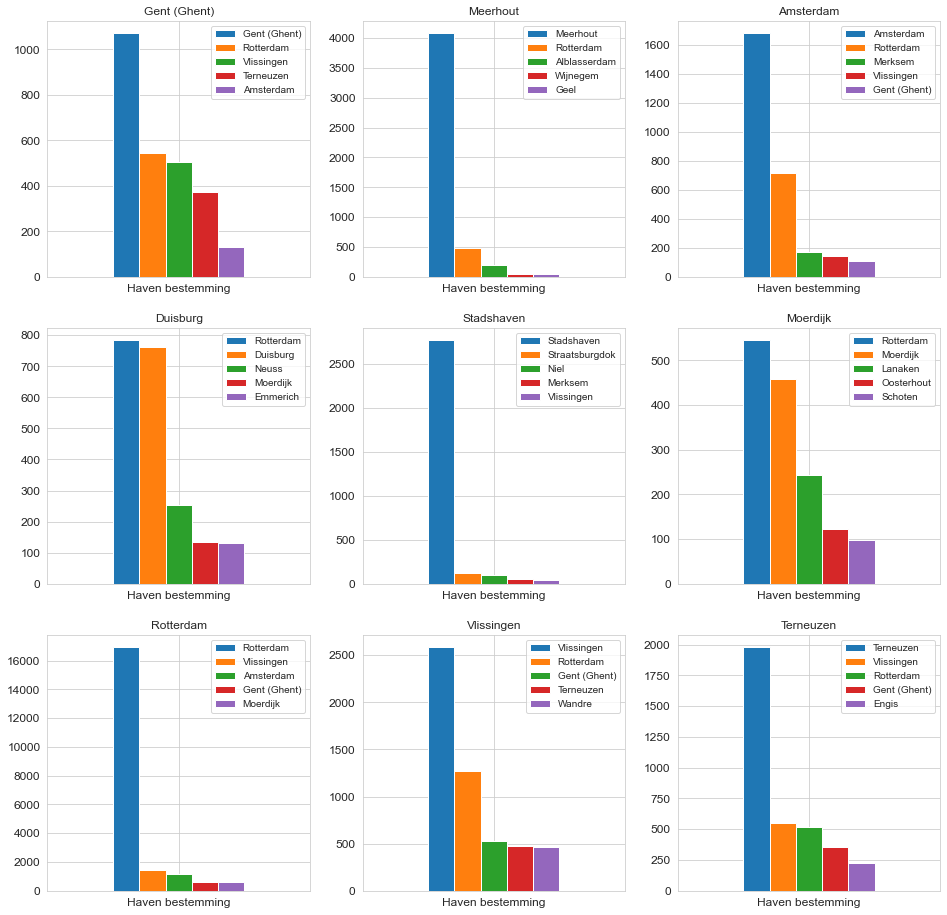

In [17]:
# Top 9 By origin and their top 5 destinations

top_9 = list(pd.DataFrame(df["Haven herkomst"].value_counts()
             )["Haven herkomst"].keys())[:9]

ranking = {place: [] for place in top_9}
for place in top_9:
    ranking[place] = df[
        df["Haven herkomst"].apply(lambda x:x == place)
    ]["Haven bestemming"].value_counts()[:5]

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16,16))
for idx, (place, bestemming) in enumerate(ranking.items()):
    pd.DataFrame(bestemming).T.plot.bar(ax=ax[idx//3-1][idx%3],
        title=place, rot=0, fontsize=12)

### Top 9 Ports based on origin count

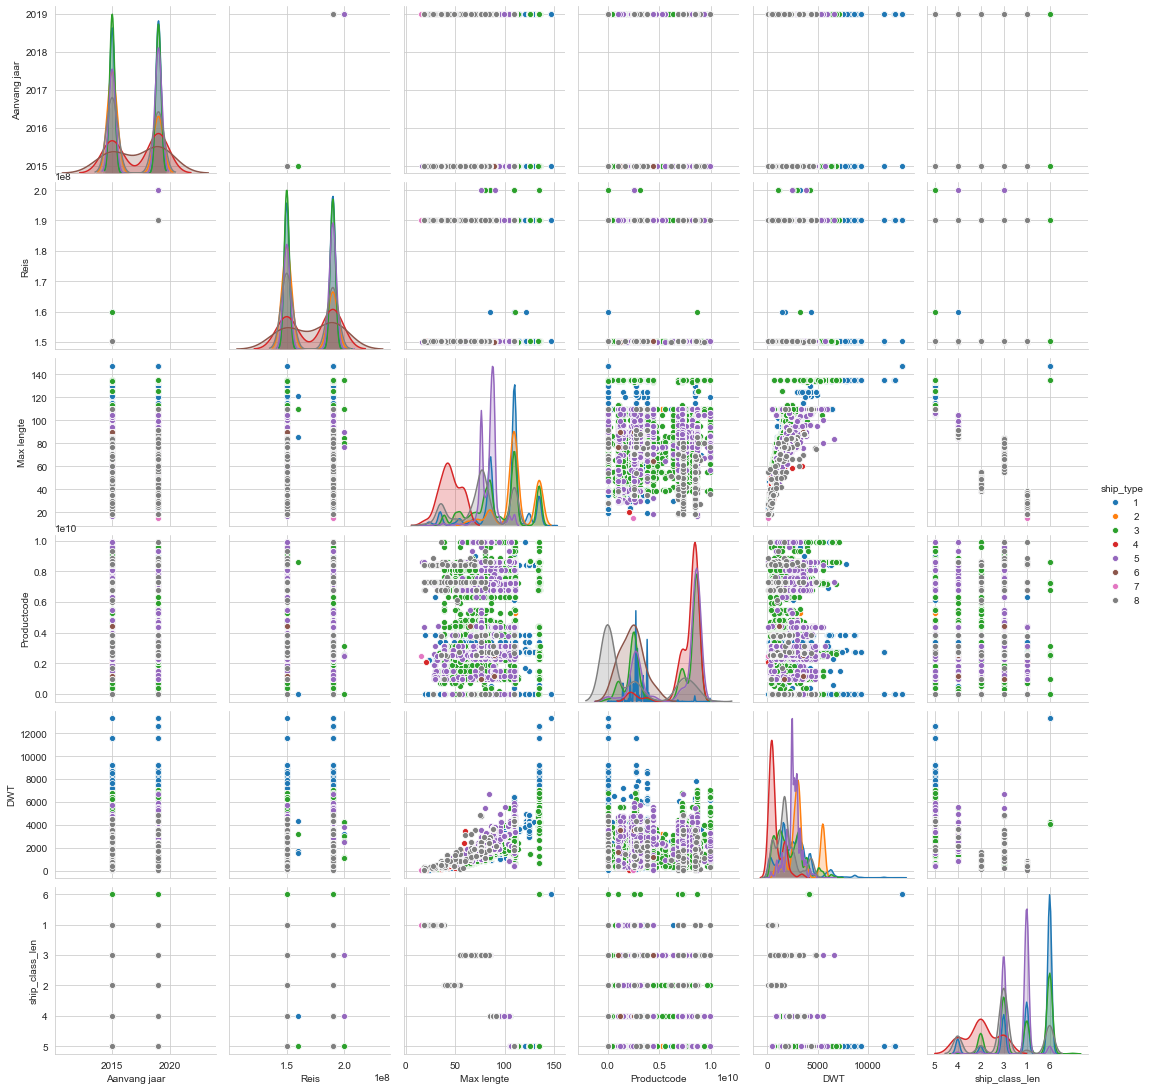

In [26]:
# Not able to draw any inferences from the pairplots

sns.pairplot(df, hue ='ship_type') 
plt.show() 

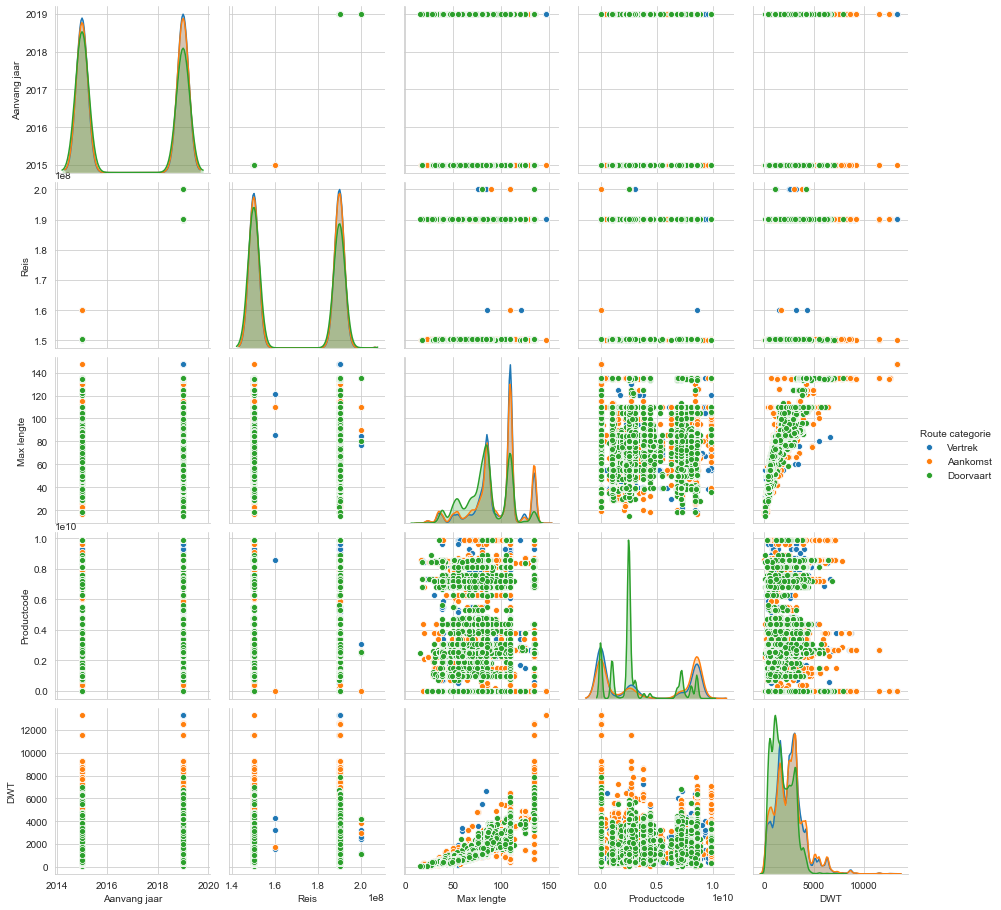

In [62]:
sns.pairplot(df, hue ='Route categorie') 
plt.show() 

In [27]:
df.drop('Product', axis=1, inplace=True)

In [28]:
df.head()

Aanvang jaar   Verblijf       Reis FD nummer ANO  Max lengte  Productcode  \
0          2015  B01340080  150000012        FD_001      109.47      1090000   
1          2015  B01340080  150000012        FD_001      109.47      2312000   
2          2015  B01340358  150000019        FD_002      114.86      1202002   
3          2015  B01340358  150000019        FD_002      114.86      3082000   
4          2015  B01340345  150000025        FD_003      134.92      3082000   

    DWT  Haven herkomst Haven bestemming Route categorie     Scheepstype  \
0  2851  Bergen op Zoom   Bergen op Zoom         Vertrek  MOTORTANKSCHIP   
1  2851  Bergen op Zoom   Bergen op Zoom         Vertrek  MOTORTANKSCHIP   
2  3504      Vlissingen       Vlissingen         Vertrek  MOTORTANKSCHIP   
3  3504      Vlissingen       Vlissingen         Vertrek  MOTORTANKSCHIP   
4  6311       Rotterdam        Rotterdam         Vertrek  MOTORTANKSCHIP   

  ship_class_len  ship_type  
0              5          1  
1              5          1  
2              5          1  
3              5          1  
4              5          1

In [29]:
df.drop(['Max lengte','Scheepstype'], axis=1, inplace=True)  # removing Max lengte and Scheepstype from df

In [30]:
df.head()

Aanvang jaar   Verblijf       Reis FD nummer ANO  Productcode   DWT  \
0          2015  B01340080  150000012        FD_001      1090000  2851   
1          2015  B01340080  150000012        FD_001      2312000  2851   
2          2015  B01340358  150000019        FD_002      1202002  3504   
3          2015  B01340358  150000019        FD_002      3082000  3504   
4          2015  B01340345  150000025        FD_003      3082000  6311   

   Haven herkomst Haven bestemming Route categorie ship_class_len  ship_type  
0  Bergen op Zoom   Bergen op Zoom         Vertrek              5          1  
1  Bergen op Zoom   Bergen op Zoom         Vertrek              5          1  
2      Vlissingen       Vlissingen         Vertrek              5          1  
3      Vlissingen       Vlissingen         Vertrek              5          1  
4       Rotterdam        Rotterdam         Vertrek              5          1

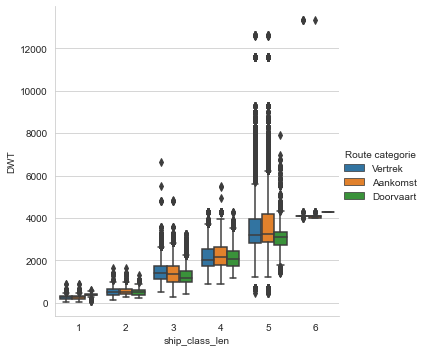

In [33]:
sns.catplot(x="ship_class_len", y="DWT", hue="Route categorie", data=df, kind="box")

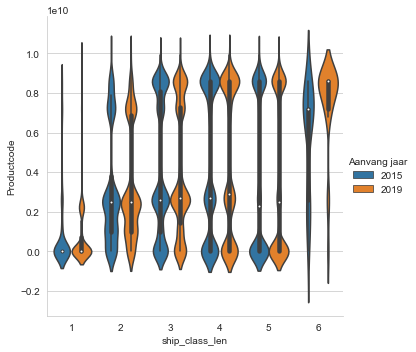

In [170]:
sns.catplot(x="ship_class_len", y="Productcode", hue="Aanvang jaar", data=df, kind="violin")

### Cannot find corelation from pairplot, boxplot and violin plot.

In [34]:
df['Verblijf'] = df['Verblijf'].astype('str')
df['FD nummer ANO'] = df['FD nummer ANO'].astype('str')
df['Haven herkomst'] = df['Haven herkomst'].astype('str')
df['Haven bestemming'] = df['Haven bestemming'].astype('str')
df['Route categorie'] = df['Route categorie'].astype('str')
df['ship_class_len'] = df['ship_class_len'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174977 entries, 0 to 174976
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Aanvang jaar      174977 non-null  int64 
 1   Verblijf          174977 non-null  object
 2   Reis              174977 non-null  int64 
 3   FD nummer ANO     174977 non-null  object
 4   Productcode       174977 non-null  int64 
 5   DWT               174977 non-null  int64 
 6   Haven herkomst    174977 non-null  object
 7   Haven bestemming  174977 non-null  object
 8   Route categorie   174977 non-null  object
 9   ship_class_len    174977 non-null  object
 10  ship_type         174977 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 14.7+ MB


In [35]:
df.head()

Aanvang jaar   Verblijf       Reis FD nummer ANO  Productcode   DWT  \
0          2015  B01340080  150000012        FD_001      1090000  2851   
1          2015  B01340080  150000012        FD_001      2312000  2851   
2          2015  B01340358  150000019        FD_002      1202002  3504   
3          2015  B01340358  150000019        FD_002      3082000  3504   
4          2015  B01340345  150000025        FD_003      3082000  6311   

   Haven herkomst Haven bestemming Route categorie ship_class_len  ship_type  
0  Bergen op Zoom   Bergen op Zoom         Vertrek              5          1  
1  Bergen op Zoom   Bergen op Zoom         Vertrek              5          1  
2      Vlissingen       Vlissingen         Vertrek              5          1  
3      Vlissingen       Vlissingen         Vertrek              5          1  
4       Rotterdam        Rotterdam         Vertrek              5          1

### Plots from Power BI

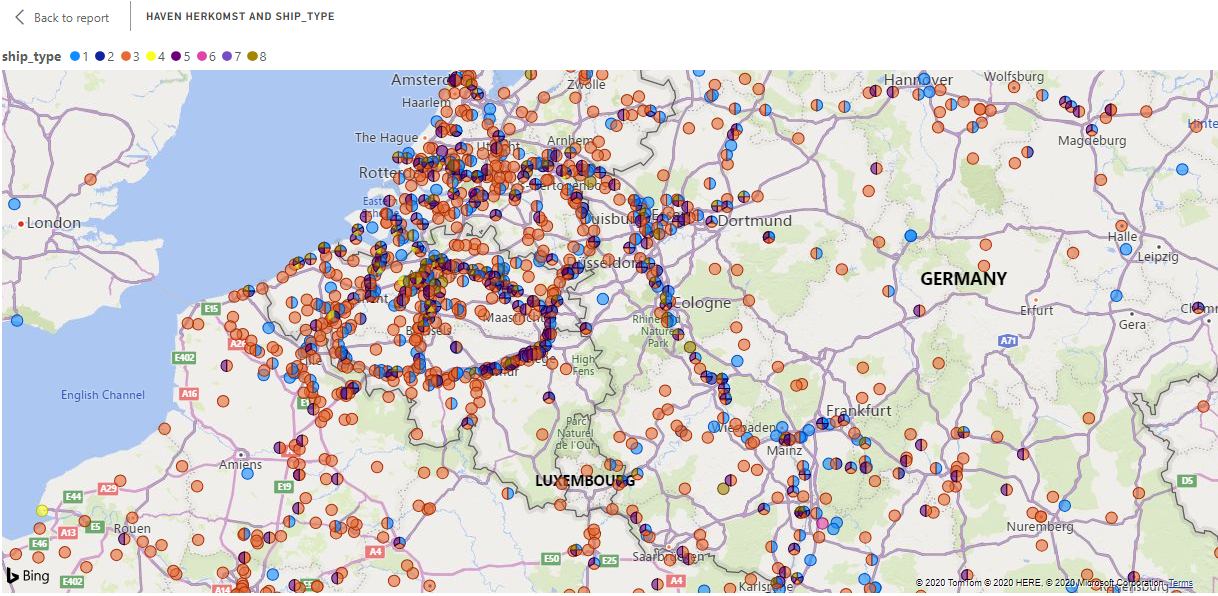

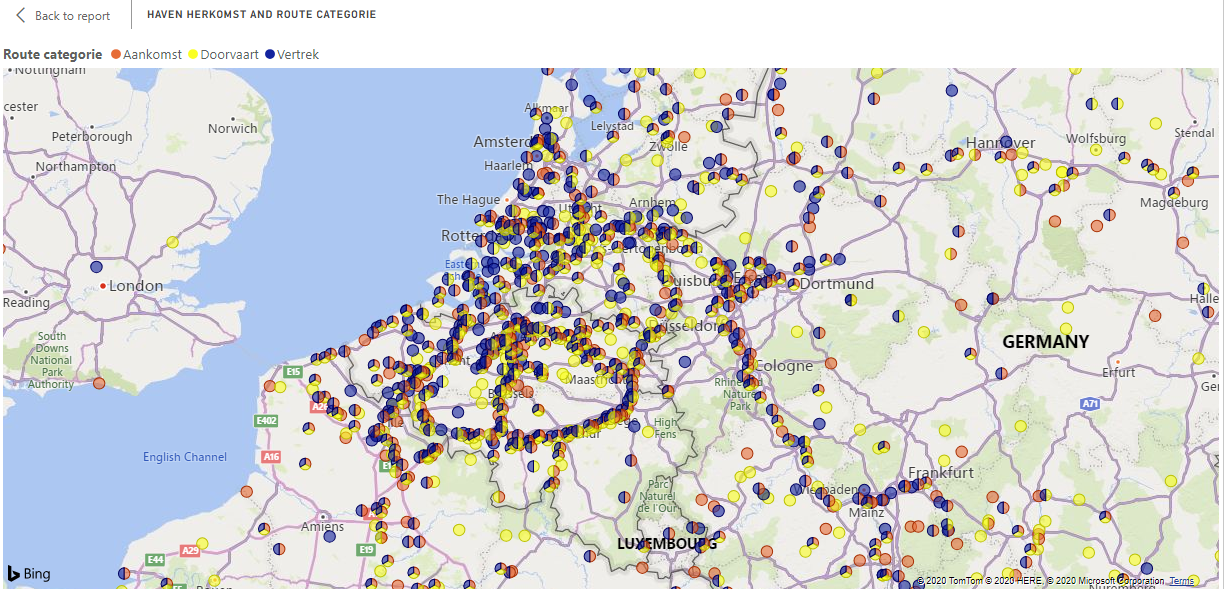

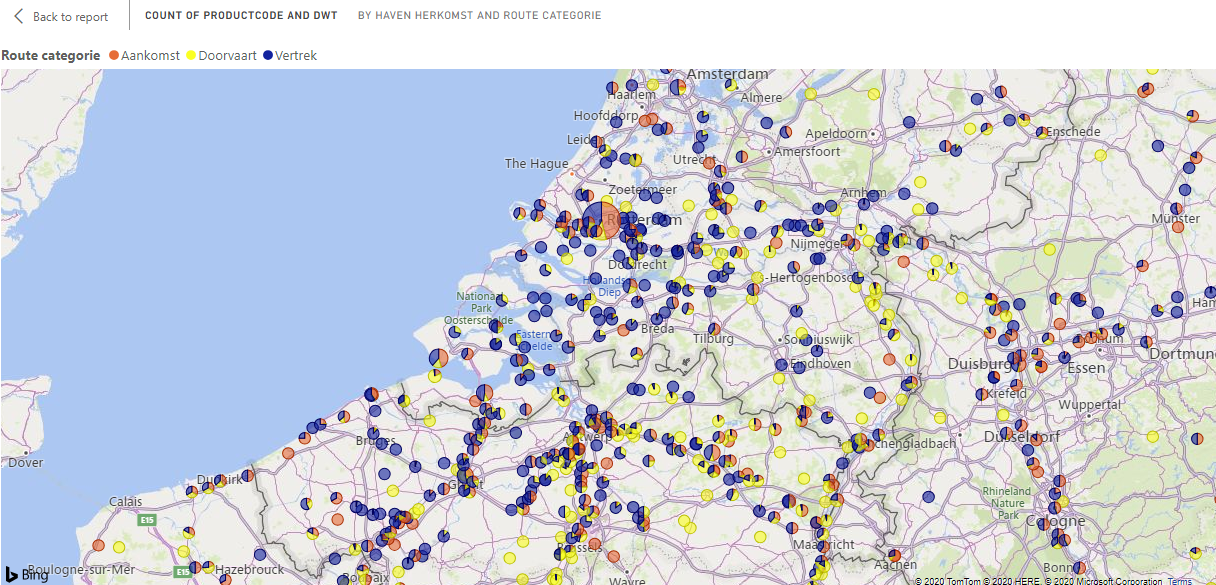

### Busy Routes with ship and tripe type visible and get the information that rotterdam is the busiest port